<a id='mda'></a>  
# multi-dimensional data aggregation

Xarray has some high level objects that let you do common computations:

1. groupby : Bin data in to groups and reduce
2. resample : Groupby specialized for time axes. Either downsample or upsample your data.
3. rolling : Operate on rolling windows of your data e.g. running mean
4. coarsen : Downsample your data
5. weighted : Weight your data before reducing

[import](#mda-import)  
[resample](#mda-resample)  
[aggregate](#mda-aggregate)  
[groupby](#mda-groupby)    
[export](#mda-export)  

In [1]:
project_id = 'gta'
#project_id = 'ea'

## Initialize

### libraries

In [13]:
import os
import glob
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
import warnings # to ignore warnings
from functools import partial # for shorter traceback error messages
from IPython.core.interactiveshell import InteractiveShell # to automtically show cell output

### parameters

In [4]:
# ignore warnings 
warnings.filterwarnings('ignore')

In [5]:
# shorter traceback error messages
get_ipython().showtraceback = partial(get_ipython().showtraceback,exception_only=True)

In [6]:
# shows result of cell without needing print
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

## directories

In [7]:
home_dir = os.path.expanduser("~")
project_dir = os.path.join(home_dir, project_id)
data_dir = os.path.join(project_dir, 'data')
restructured_data_dir = os.path.join(data_dir, 'restructured-data')
aggregated_data_dir = os.path.join(data_dir, 'aggregated-data') 

'/Users/rkforest/gta/data/aggregated-data'

In [8]:
def create_directory(directory_name):
    if not os.path.exists(directory_name):
        print('Created new directory: ', directory_name)
        os.mkdir(directory_name)

In [9]:
create_directory(aggregated_data_dir)

In [10]:
os.chdir(project_dir)
os.getcwd()

'/Users/rkforest/gta'

### paths

In [14]:
file_paths =  sorted(glob.glob(os.path.join(restructured_data_dir, '*.nc')))
[print(path) for path in file_paths];

/Users/rkforest/gta/data/restructured-data/global_multi-dimensional_coarsened.nc


<a id='mda-import'></a>
## import

[Return to Start of Notebook](#mda)  

In [15]:
file_path = file_paths[0]
ds = xr.open_dataset(file_path)
type(ds)

xarray.core.dataset.Dataset

In [16]:
ds

<xarray.Dataset>
Dimensions:      (time: 1719, lat: 45, lon: 90, nv: 2)
Coordinates:
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-03-15
  * lon          (lon) float32 -178.0 -174.0 -170.0 -166.0 ... 170.0 174.0 178.0
  * lat          (lat) float32 -88.0 -84.0 -80.0 -76.0 ... 76.0 80.0 84.0 88.0
Dimensions without coordinates: nv
Data variables:
    tempanomaly  (time, lat, lon) float32 ...
    time_bnds    (time, nv) datetime64[ns] ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200,...

<a id='xr-resample'></a>
## resample

[Return to Start of Notebook](#xr)  

In [17]:
ds10yr = ds.resample(time='10Y').mean()
ds10yr.attrs = ds.attrs

In [18]:
ds10yr

<xarray.Dataset>
Dimensions:      (time: 16, lat: 45, lon: 90)
Coordinates:
  * lon          (lon) float32 -178.0 -174.0 -170.0 -166.0 ... 170.0 174.0 178.0
  * lat          (lat) float32 -88.0 -84.0 -80.0 -76.0 ... 76.0 80.0 84.0 88.0
  * time         (time) datetime64[ns] 1880-12-31 1890-12-31 ... 2030-12-31
Data variables:
    tempanomaly  (time, lat, lon) float32 nan nan nan nan ... 3.477 3.477 3.477
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200,...

<a id='xr-aggregate'></a>
## Aggregate

[Return to Start of Notebook](#xr)  

In [20]:
da = ds10yr['tempanomaly']

<xarray.DataArray 'tempanomaly' (time: 16, lat: 45, lon: 90)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 3.2600837 ,  3.2600837 ,  3.087917  , ...,  3.2371664 ,
          3.3373337 ,  3.3373337 ],
        [ 3.3009176 ,  3.3009176 ,  3.3009176 , ...,  3.3009176 ,
          3.3009176 ,  3.3009176 ],
        [ 3.3009176 ,  3.3009176 ,  3.3009176 , ...,  3.3009176 ,
          3.3009176 ,  3.3009176 ]],

       [[-0.35148147, -0.35148147, -0.35148147, ..., -0.35148147,
         -0.35148147, -0.35148147],
        [-0.35148147, -0.35148147, -0.35148147, ..., -0.35148147,
         -0.35148147, -0.35148147],
        [ 0.96518517,  0.96518517,  0.9137036 , ...,  1.0414815 ,
          1.0218519 ,  1.0218519 ],
        ...,
        [ 2.3055556 ,  2.3055556 ,  2.23      , ...,  2.5970368 ,
          2.515555  ,  2.515555  ],
        [ 3.4766665 ,  3.4766665 ,  3.4766665 , ...,  3.4766665 ,
          3.4766665 ,  3.4766665 ],
        [ 3.4766665 ,  3.4766665 ,  3.4766665 , ...,  3.4766665 ,
          3.4766665 ,  3.4766665 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -178.0 -174.0 -170.0 -166.0 ... 170.0 174.0 178.0
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
  * time     (time) datetime64[ns] 1880-12-31 1890-12-31 ... 2030-12-31
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200,...

In [21]:
da.mean(dim="time")

<xarray.DataArray 'tempanomaly' (lat: 45, lon: 90)>
array([[0.01364019, 0.01364019, 0.01364019, ..., 0.01364019, 0.01364019,
        0.01364019],
       [0.01364019, 0.01364019, 0.01364019, ..., 0.01364019, 0.01364019,
        0.01364019],
       [0.4328033 , 0.4328033 , 0.42760274, ..., 0.43680304, 0.44064373,
        0.44064373],
       ...,
       [0.57484347, 0.57484347, 0.4627278 , ..., 0.5626149 , 0.5613465 ,
        0.5613465 ],
       [1.0852033 , 1.0852033 , 1.0852033 , ..., 1.0852033 , 1.0852033 ,
        1.0852033 ],
       [1.0852033 , 1.0852033 , 1.0852033 , ..., 1.0852033 , 1.0852033 ,
        1.0852033 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -178.0 -174.0 -170.0 -166.0 ... 170.0 174.0 178.0
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0

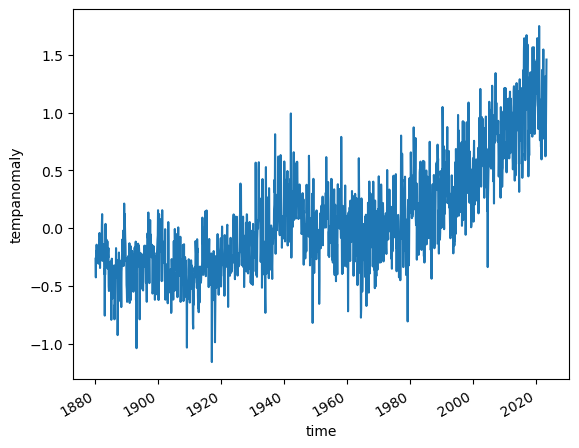

In [22]:
ds['tempanomaly'].mean(dim=["lat","lon"]).plot()

<a id='xr-groupby'></a>
## Groupby

[Return to Start of Notebook](#xr)  

In [23]:
da.groupby('time').mean(["lat","lon"])

<xarray.DataArray 'tempanomaly' (time: 16)>
array([-0.21902761, -0.32950056, -0.28657505, -0.3695973 , -0.3491166 ,
       -0.15573195,  0.03539218,  0.06495233,  0.01388237, -0.06319485,
        0.04788777,  0.23190443,  0.3789274 ,  0.7140682 ,  1.0160068 ,
        1.0363437 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1880-12-31 1890-12-31 ... 2030-12-31
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200,...

In [24]:
gb = ds['tempanomaly'].groupby(ds.time.dt.month)
gb

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

### concise syntax

In [25]:
gb = ds['tempanomaly'].groupby('time.month')
gb

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

### iterate over groups

In [26]:
for group_name, group_da in gb:
    # stop iterating after the first loop
    break 
print(group_name)
group_da

1


<xarray.DataArray 'tempanomaly' (time: 144, lat: 45, lon: 90)>
array([[[  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       ...,

       [[-0.69, -0.69, ..., -0.69, -0.69],
        [-0.69, -0.69, ..., -0.69, -0.69],
        ...,
        [ 3.8 ,  3.8 , ...,  3.8 ,  3.8 ],
        [ 3.8 ,  3.8 , ...,  3.8 ,  3.8 ]],

       [[-3.27, -3.27, ..., -3.27, -3.27],
        [-3.27, -3.27, ..., -3.27, -3.27],
        ...,
        [ 5.38,  5.38, ...,  5.38,  5.38],
        [ 5.38,  5.38, ...,  5.38,  5.38]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-15 1881-01-15 ... 2023-01-15
  * lon      (lon) float32 -178.0 -174.0 -170.0 -166.0 ... 170.0 174.0 178.0
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200,...

### map 
- (similar to pandas apply)

In [27]:
gb.map(np.mean)

<xarray.DataArray 'tempanomaly' (month: 12)>
array([0.11021842, 0.13665047, 0.16327089, 0.08408697, 0.0780835 ,
       0.06151845, 0.08123977, 0.08285616, 0.11095167, 0.17247152,
       0.16015664, 0.10604829], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [28]:
ta = gb.mean(dim='time')
ta;

In [28]:
ta.sel(lon=-179, lat=-89).plot()

Difference between January and July Anomalies

<a id='xr-visualize'></a>
## Visualize

[Return to Start of Notebook](#xr)  

In [29]:
plot_decade = 2020

2020

ERROR! Session/line number was not unique in database. History logging moved to new session 1026


### .plot()

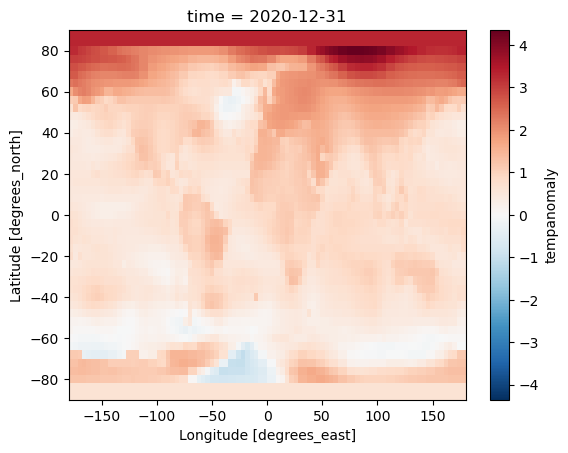

In [30]:
da.sel(time=str(plot_decade)).plot(yincrease=True) # default yincrease=True

<a id='xr-export'></a>
## Export

[Return to Start of Notebook](#xr)  

In [31]:
save_file_name = 'global_multi-dimensional_average_10y.nc'
save_path = os.path.join(aggregated_data_dir,  save_file_name)

'/Users/rkforest/gta/data/aggregated-data/global_multi-dimensional_average_10y.nc'

In [32]:
ds10yr.to_netcdf(save_path) 